# Infinite Well Ground State Energy
### by David Rosenman


## Analytical Derivation of Ground State Energy

A particle of mass $\mathrm{m}$ is confined to move inside an infinitely deep symmetric potential well. Outside the well, the potential infinite, thus the particle is confined to move only within the boundaries of the well of length $\mathrm{a}$ centered at the origin. The potential, which depepnds only on the positive (x), is given by:

$$V = \left\{ {\begin{array}{*{20}{c}}
{ + \infty ,}&{x < 0}\\
{0,}&{ - \frac{a}{2} \le x \le \frac{a}{2}}\\
{ + \infty ,}&{x > a}
\end{array}} \right.$$

Since the potential is independent of time, the equation of state of the particle must be a superposition of stationary states of the form
$$\Psi(x,t) = \psi(x)\phi (t)=\psi (x) e^{\frac{iEt}{\hbar}}$$

E is the energy associated with the stationary states, which is constant. $\psi(x)$ satisfies the time independent Schrodinger equation, which is 
$$-\frac{\hbar^2}{2m}\frac{d^2 \psi (x)}{dx^2} + V(x) \psi(x) = E \psi(x)$$

For the case of a one-dimensional infinite square well, V = 0 inside the well. It follows that inside the well, the motion of the particle satisfies
$$\frac{d^2 \psi (x)}{dx^2} + k^2 \psi(x) = 0$$

with
$$k^2 = \frac{2mE}{\hbar^2}$$

The general solution to the differential equation above is
$$\Psi(x) = A \sin{kx} + B \cos{kx}$$

Since the well is a symmetric well, $\psi(x) = \psi(-x)$. Since $\psi$ is an even function $A=0$, and the general solution for a symmetric potential well is given by
$$\psi(x) = B\cos{kx}$$

The probability density of the position of the particle is given by
$$\Psi^2 (x,t) = \left(\psi(x) e^\frac{iEt}{\hbar}\right)\left(\psi(x)e^\frac{-iEt}{\hbar}\right) = \psi^2(x)$$

Since the particle cannot be found at or beyond the boundaries of the well, the probability density at $x \pm a/2$ is equal to 0.
$$\Psi(\pm \frac{a}{2}) = B \cos{\left(\pm k \frac{a}{2}\right)} = 0$$

Since $k$ is a positive constant,
$$k = n \frac{\pi}{a}= \frac{\sqrt{2mE}}{\hbar}$$

The value of the constant $B$ is determined by the normalization condition as follows:
$$1 = \int_{ - \frac{a}{2}}^{\frac{a}{2}} {{{\left( {\psi \left( x \right)} \right)}^2}dx = \int_{ - \frac{a}{2}}^{\frac{a}{2}} {{B^2}{{\cos }^2}\left( {\frac{{n\pi }}{a}x} \right)dx = \frac{{{B^2}}}{2}a} }$$

$$B = \sqrt{\frac{2}{a}}$$

It follows that the solution to the time independent Schrodinger equation is 
$$\psi(x) = \sqrt{\frac{2}{a}} \cos{\frac{n \pi x}{a}}$$

for $n = 1,2,3...$. Therefore the allowable values of the energy, $E$, are given by
$$ E = \frac{n^2 \pi^2 \hbar^2}{2 a^2m}, \ \ \  n = 1,2,3...$$

To simplify the numerical calculation, $a$,$m$,and $\hbar$ will each be given the value. The ground state energy, which is the energy value for the state in which $n=1$ is
$$E_{ground} = \frac{\pi}{2}$$

and the solution to the Schrodinger equation simplifies to 
$$\psi(x) = \sqrt{2}\cos{(n\pi x)}$$

## Numerical Approximation of Ground State Energy

The starting points for the numerical calculation of the ground state energy is the solution of the Schrodinger equation, $\psi(x) = \sqrt{2}\cos{(n\pi x)}$. Since the ground state is characterized by $n = 1$, the ground state solution to the Schrodinger equation is 

$$\psi(x) = \sqrt{2} \cos{\pi x}$$

## Discretized Numerical Appoximation of the Schrodinger Equation

The Schrodinger equation is a continuous funciton, but in order to derive approximate solutions, it must be made discrete. This is done using Euler's method of iteraive linear approximations as follows.

$$\psi_0 = \psi_1 = 1$$
$$\frac{d \psi_1}{dx} = 0$$
$$\psi_{i+2} = 2 \psi_{i+1} - \psi{i} - 2\left(\Delta x\right)^2 E_{ground}\psi_i$$

By incrementing the argument of the Schrodinger equation by $\Delta x = 0.001$, the equation for $\psi_{i+2}$ above will be iterated 500 times between the boundaries of the well. The value of the Schrodinger equation, $\psi$, for the 500th iteration depends on teh value of the ground state energy, $E_ground$, and must be equal to 0. Since it is impractical to expect a numerical approximation to arive at exactly zero, a value within $\pm 10^{-3}$ will be allowed. 

The iterated calculation in Python will start with $E_{ground} = 0$. If the value of $\psi$ for the 500th iteration is not within $\pm 10^{-3}$, the value of E_{ground} will be increased slightly. The energy will continue to be adjusted by this amount until $\psi$ is within $10^{-3}$ units of 0.

### Python Algorithm 

501
0.5


<IPython.core.display.Javascript object>


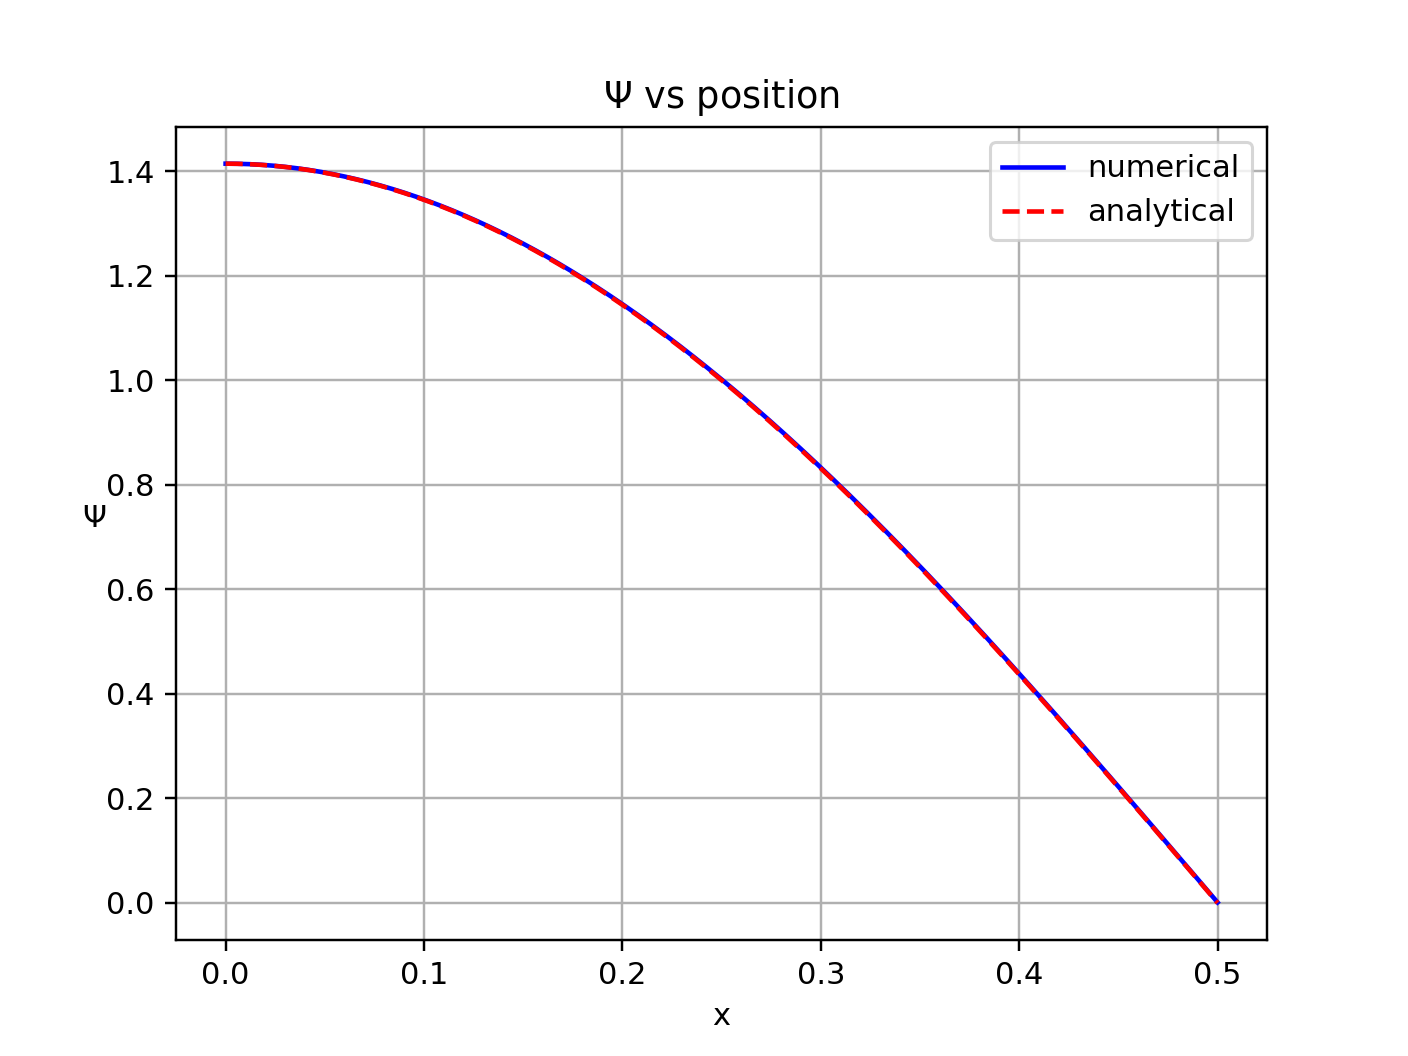


        The estimated energy is 4.931
. 
        The difference between this estimation of the energy and 
        the theoretical value of the energy is 0.0038022005447. 

        Percent error = 0.0770486919269%. 

        When the energy is 4.931, the value of psi when x = 0.5 
        is 0.000865391396982.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


delta_x = .5/500
x = np.arange(0,.5+delta_x,delta_x) #array of values of independent variable
psi = np.zeros(len(x)) #array of values for psi
energy = 0 #starting value for energy
theoretical_energy = (np.pi**2) / 2
error = 0.001
psi[0] = np.sqrt(2)
psi[1] = np.sqrt(2)
print(len(x))
print(x[500])
loop_continue = True
while loop_continue:
    for i in range(0,len(x) - 2):
        psi[i+2] = 2*psi[i+1] - psi[i] - 2*(delta_x**2)*energy*psi[i]
    if abs(psi[i+2]) > error:
        energy += 0.001
    else:
        difference = abs(energy - theoretical_energy)
        plt.plot(x, psi, 'b',label = 'numerical')
        print("""
        The estimated energy is {}\n. 
        The difference between this estimation of the energy and 
        the theoretical value of the energy is {}. \n
        Percent error = {}%. \n
        When the energy is {}, the value of psi when x = 0.5 
        is {}.""".format(energy,difference,(difference/theoretical_energy)*100,
                         energy,psi[i+2]))
        loop_continue = False
plt.plot(x,np.sqrt(2)*np.cos(np.pi * x),'r--',label = 'analytical')

plt.xlabel('x')
h = plt.ylabel('$\\Psi$')
h.set_rotation(0)
plt.title('$\\Psi$ vs position')
plt.grid()
plt.legend();